<h1><center>Assumptions of Linear Regression</center></h1>

### Most statistical tests rely upon certain assumptions about the variables used in the analysis. When these assumptions are not met the results may not be trust worthy. 
  * Here we will discuss the assumptions of linearity, reliability of measurement, homoscedasticity, and normality. (reference http://people.duke.edu/~rnau/testing.htm, <a href="./UCI_regression_analysis.pdf"> UCI - Assumptions or LR </a> )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

In [2]:
emp_data_df_obj = pd.read_csv('../../Data/normal_employee_data.csv')

In [3]:
emp_data_df_obj.columns

Index(['Emp #', 'Designation', 'Experience', 'Salary', 'AggrBehavScore',
       'ActivityScore', 'LinesOfCode'],
      dtype='object')

In [4]:
linear_model = smf.ols(formula='Salary ~ Designation + Experience + AggrBehavScore \
                       + ActivityScore + LinesOfCode', data=emp_data_df_obj).fit()

In [5]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     38.23
Date:                Fri, 14 Feb 2020   Prob (F-statistic):           3.23e-11
Time:                        09:09:21   Log-Likelihood:                -309.59
No. Observations:                  32   AIC:                             641.2
Df Residuals:                      21   BIC:                             657.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -8.4e+04   4.02e+05     -0.209      0.836    -9.2e+05    7.52e+05
Designation[T.Director]    1.342e+04   9829.032      1.365      0.187   -7023.177    3.39e+04
Designation[T.Jr.Dev]     -5120.6427   1.16e+04     -0.443      0.662   -2.92e+04    1.89e+04
Designation[T.Manager]     1.249e+04   4034.890      3.095      0.005    4095.075    2.09e+04
Designation[T.Sr.Analyst]  6851.3403   2933.802      2.335      0.030     750.165     1.3e+04
Designation[T.Sr.Dev]     -1608.9100   3812.894     -0.422      0.677   -9538.258    6320.438
Designation[T.Sr.Manager]  1.264e+04   6204.292      2.037      0.054    -263.037    2.55e+04
Experience                 3694.9083   1228.857      3.007      0.007    1139.360    6250.457
AggrBehavScore            -1.015e+05   4.02e+05     -0.253      0.803   -9.37e+05    7.34e+05
ActivityScore              2791.5110   3760.490      0.742      0.466   -5028.857    1.06e+04
LinesOfCode                  94.9497    401.049      0.237      0.815    -739.077     928.977
==============================================================================
Omnibus:                       11.810   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               16.455
Skew:                           0.822   Prob(JB):                     0.000267
Kurtosis:                       6.105   Cond. No.                     2.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Regression Assumptions:

**1) Linearity** 
   - This assumption implies that there should be linear relationship between the response variables and the predictors. if you fit a linear model to data which are nonlinearly or nonadditively related, your predictions are likely to be seriously in error, especially when you extrapolate beyond the range of the sample data. 
    
**How to diagnose:** nonlinearity is usually most evident in a plot of **observed versus predicted values** or a plot of **residuals versus predicted values**. (The residual-versus-predicted-plot is better, because it eliminates the visual distraction of a sloping pattern). In multiple regression models, nonlinearity or nonadditivity may also be revealed by systematic patterns in plots of the residuals versus individual independent variables (will show below)

#### Simple Example to understand Residuals vs Fitted Graph

In [6]:
poly_dataset = pd.read_csv('../../Data/reg_analysis_poly_set.csv')
X = poly_dataset['input_feature'].values.reshape(-1,1)
y= poly_dataset['output_feature'].values.reshape(-1,1)

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
predicted = lin_reg.predict(X)
residuals = y - predicted

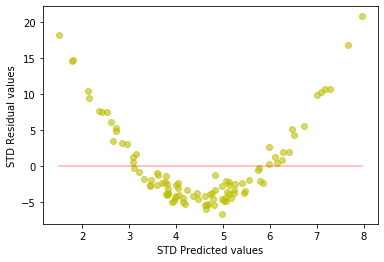

In [9]:
plt.scatter(predicted, residuals, alpha = 0.6, color='y')
plt.plot([min(predicted),max(predicted)],[0, 0], color='r', alpha=0.3)
plt.xlabel('STD Predicted values')
plt.ylabel('STD Residual values')
plt.show()

* **The relationship between X and y will be as above. Let's check it out.**

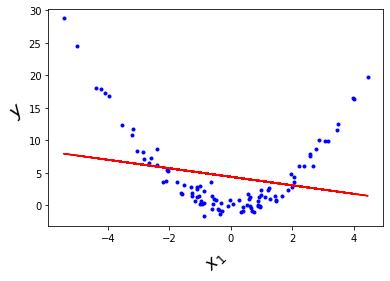

In [10]:
plt.plot(X, y, "b.")
plt.plot(X, predicted, "r")
plt.xlabel("$x_1$", rotation=45, fontsize=18)
plt.ylabel("$y$", rotation=45, fontsize=18)
plt.show()

#### Let's Plot Observed vs Predicted our Salary dataset

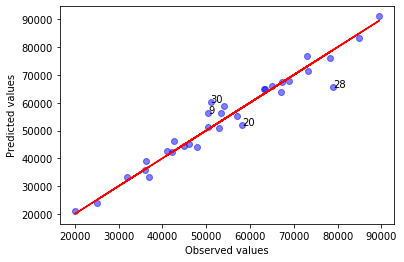

In [12]:
observed = emp_data_df_obj['Salary']
predicted = linear_model.predict(emp_data_df_obj[['Designation', 'Experience', 'AggrBehavScore', 'ActivityScore', 'LinesOfCode']])
residuals = observed- predicted
plt.scatter(observed, predicted, alpha = 0.5, color='blue')
for i in range(len(observed)):
    idx = observed.index[i]
    if(np.abs(residuals[idx]) > 5000):
        plt.text(observed[idx], predicted[idx], s=str(idx))
        
plt.plot(observed, observed, color='red')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.show()

#### Residuals vs Redicted - Plot

In [12]:
def standard_scale(val):
    mean_vals = np.mean(val)
    std_vals = np.std(val)
    z_vals = [(x - mean_vals)/std_vals for x in val]
    return z_vals

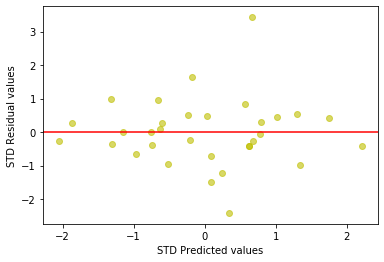

In [13]:
std_residuals = standard_scale(residuals)
std_predicted = standard_scale(predicted)

plt.scatter(std_predicted, std_residuals, alpha = 0.6, color='y')
l = plt.axhline(y=0, color='r')
plt.xlabel('STD Predicted values')
plt.ylabel('STD Residual values')
plt.show()

**How to Fix:** To overcome the issue of non-linearity, you can do a non linear transformation of predictors such as log (X), √X or X² transform the dependent variable.

**2) Heteroskedasticity (Homoscedasticity should be present)**
   - The presence of **non-constant variance in the error terms <font color="red">(as X values are increasing, model is failing to predict response variable properly)</font>** results in heteroskedasticity, which is not desirable in dataset. Generally, non-constant variance arises in presence of outliers or extreme leverage values. Looks like, these values get too much weight, thereby disproportionately influences the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.

**How to check:** You can look at residual vs predicted (or fitted) values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern (example shown below). Also, you can use Breusch-Pagan / Cook – Weisberg test or White general test to detect this phenomenon.
<img src="../../img/homo_Hetero_skedasticity.png" />
**How to Fix:** To overcome heteroskedasticity, a possible way is to transform the response variable such as log(Y) or √Y. Also, you can use weighted least square method to tackle heteroskedasticity.

**3) Normal Distribution of error terms**

   - Calculation of confidence intervals and various significance tests for coefficients are all based on the assumptions of normally distributed errors. If the error distribution is significantly non-normal, confidence intervals may be too wide or too narrow.
   - Also, a significant violation of the normal distribution assumption is often a <font color='red'>red flag </font> indicating that there is some other problem with the model assumptions and/or that there are a few unusual data points (may be outliers or leverage points) that should be studied closely and/or that a better model is still waiting out there somewhere.
   
**How to check:** You can look at QQ plot (shown below). 

   - If the distribution is normal, the points on QQ plot should "fall close to the diagonal reference line".
    
   - A "bow-shaped pattern" of deviations from the diagonal indicates that the residuals have excessive skewness (i.e., they are not symmetrically distributed, with too many large errors in one direction). 
    
   - An "S-shaped pattern" of deviations indicates that the residuals have excessive kurtosis (i.e., there are either too many or two few large errors in both directions.)  
    
   - Sometimes the problem is revealed to be that there are a few data points on one or both ends that deviate significantly from the reference line ("outliers"), in which case they should get close attention. 
    
   - Different statistical test:  Kolmogorov-Smirnov test, the Shapiro-Wilk test, the Jarque-Bera test, and the Anderson-Darling test.

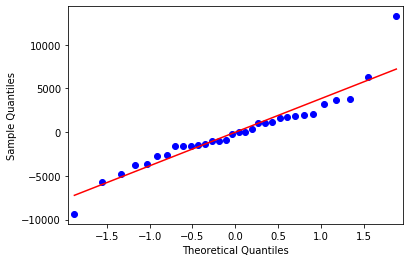

In [14]:
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.show()

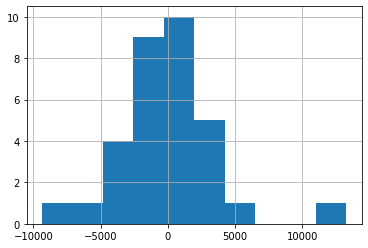

In [16]:
plot = residuals.hist()

**How to fix:** Violations of normality often arise either because 
   
   (a) The distributions of the dependent and/or independent variables are themselves significantly non-normal, and/or 
    
   (b) The linearity assumption is violated. In such cases, a nonlinear transformation of variables might cure both problems.

* **Note:** The dependent and independent variables in a regression model do not need to be normally distributed by themselves only the prediction errors need to be normally distributed.

**4) Serial correlation or Auto correlatioin** 
   - Potentially very serious in time series regression models. The correlation between consecutive errors or errors separated by some other number of periods is known as "Serial correlation". Serial correlation is sometimes a by product of a violation of the linearity assumption.
   
**How to Check:** Look for Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation. Also, you can see residual vs time plot and look for the seasonal or correlated pattern in residual values.

**How to Fix:**  Serial correlation could be due to a violation of the linearity assumption or due to bias that is explainable by omitted variables (say, interaction terms).

**5) Multicollinearity**
   
   - **Collinearity -** Collinearity refers to the situation in which **two or more predictor** variables are closely related to one another. This will create problems in finding out individual predictor's effect on the response variable. 
   
   - **Multicollinearity -** Collinearity can be detected by using correlation matrix. The collinearity may exist between three or more predictors even if no pair of predictors has a particularly high correlation. This situation is called Multicollinearity.

**How to check:** You can use heatmap/scatter plot to visualize correlation effect among variables. Also, we can use VIF (Variance Inflation Factor). VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. Above all, a correlation table should also solve the purpose.

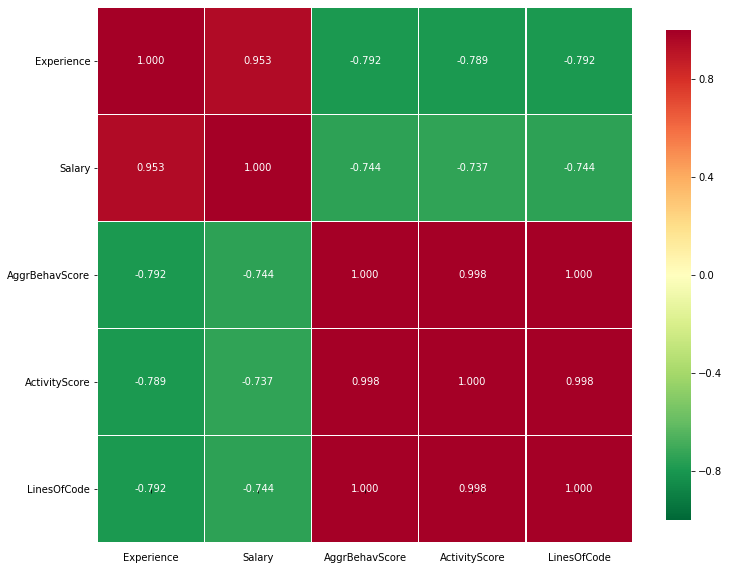

In [15]:
plt.rcParams['xtick.major.pad']=60

fig, ax = plt.subplots(figsize=(12,9)) 
heatmap = sns.heatmap(emp_data_df_obj.corr(), cmap='RdYlGn_r', fmt='.3f', annot=True,  
                      clip_on=False, xticklabels=True, vmin=-1, vmax=1, linewidth=0.5, square=True)
heatmap = plt.yticks(rotation=0)

**How to fix:** 
  * Mean centering will help decreases multicollinearity between an interaction term and original variable.
  * We can deal with this issue using regularization concept, which will be delt in coming sessions.